In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. EDA & Data Cleaning

In [2]:
# This gets the current working directory (where the notebook is assumed to be running)
current_directory = os.getcwd()

# Now you can construct the path to your file relative to the notebook's root directory
file_path = os.path.join(current_directory, 'housing.csv')

# Use the file path with pandas
df = pd.read_csv(file_path)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
df = df[df['ocean_proximity'] != 'ISLAND']

_the 'ISLAND' values will be a problem when splitting the data so better drop them now_

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000,20428.000000
mean,-119.570986,35.633778,28.629724,2636.764147,537.899305,1425.132220,499.488007,3.871437,206821.928432
std,2.003732,2.136312,12.590156,2185.451409,421.425970,1133.277418,382.326831,1.899432,115412.337452
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,788.000000,280.000000,2.563400,119475.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.537500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.250000,647.000000,1723.000000,604.000000,4.744075,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Data Perprocessing

In [11]:
from sklearn.model_selection import train_test_split

x = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
df_train = X_train.join(y_train)

In [14]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11294,-117.92,33.79,35.0,1785.0,288.0,1033.0,297.0,4.5739,<1H OCEAN,190500.0
20164,-119.28,34.45,36.0,2376.0,541.0,1505.0,547.0,2.4595,<1H OCEAN,197600.0
6724,-118.12,34.13,52.0,2935.0,341.0,975.0,327.0,11.7060,<1H OCEAN,500001.0
6319,-117.97,34.00,28.0,1983.0,375.0,1407.0,367.0,3.8319,<1H OCEAN,179000.0
5830,-118.31,34.20,36.0,1692.0,263.0,778.0,278.0,5.0865,<1H OCEAN,349600.0


In [15]:
df_train['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7206
INLAND        5178
NEAR OCEAN    2132
NEAR BAY      1826
Name: count, dtype: int64

## Transformation Function

In [16]:
def transform_data(df):
    df_t = df.copy()
    
    # Apply log transformation
    for column in ['total_rooms', 'total_bedrooms', 'population', 'households']:
        df_t[column] = np.log(df_t[column] + 1)
    
    # One-hot encode 'ocean_proximity'
    df_t = df_t.join(pd.get_dummies(df_t['ocean_proximity'])).drop('ocean_proximity', axis=1)
    
    # Create new features
    df_t['bedrooms_per_room'] = df_t['total_bedrooms'] / df_t['total_rooms']
    df_t['household_room'] = df_t['households'] / df_t['total_rooms']
    
    return df_t

# 2. Data Visualization

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

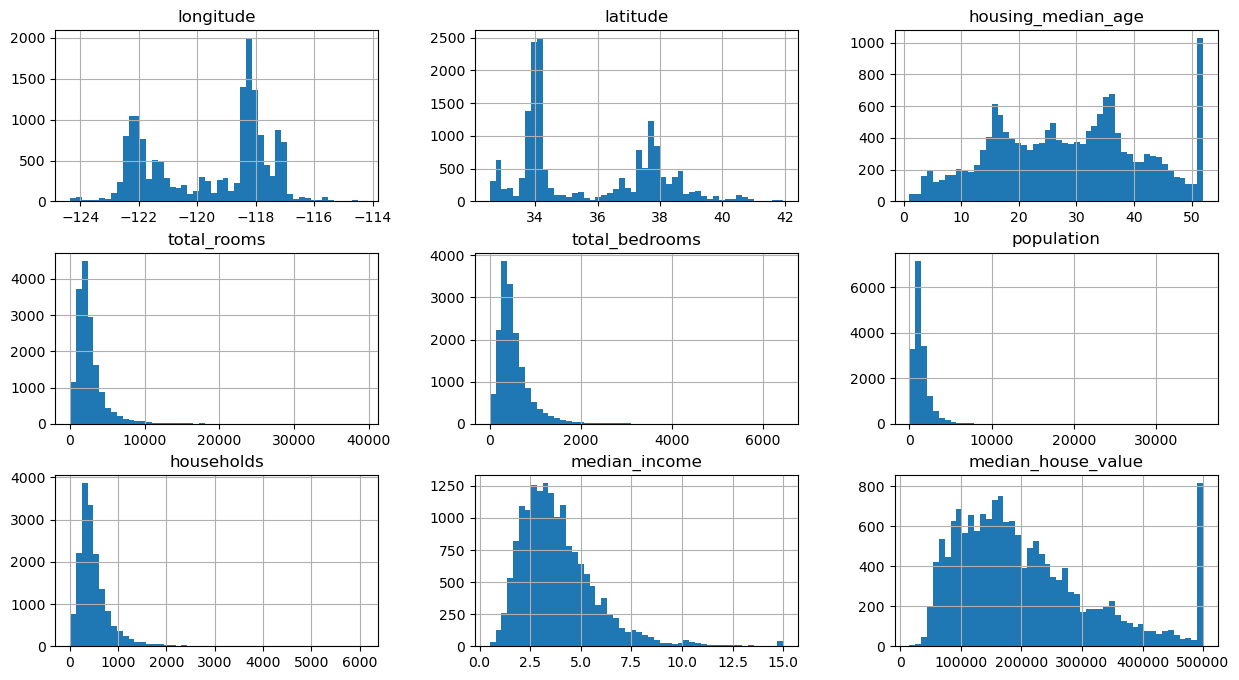

In [17]:
df_train.hist(figsize=(15, 8),bins = 50)

<Axes: >

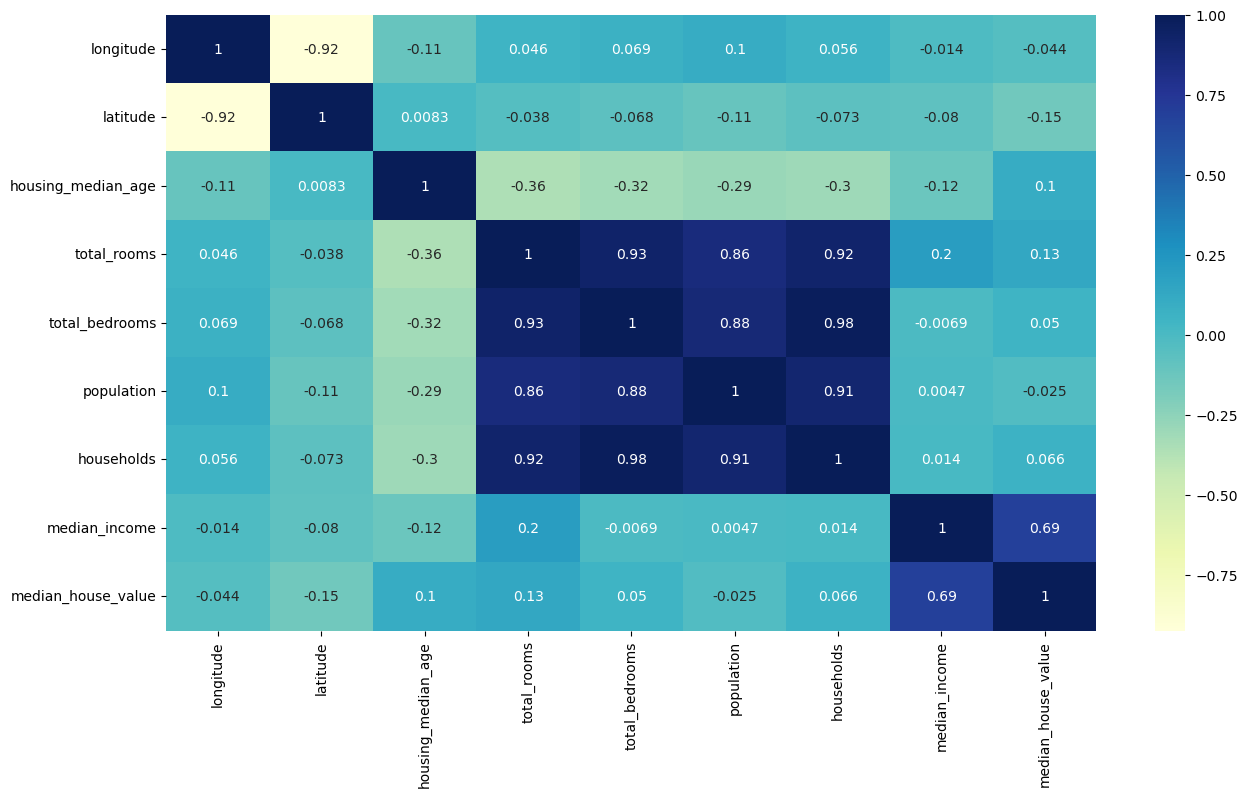

In [18]:
numeric_df = df_train.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')

In [19]:
df_train = transform_data(X_train.join(y_train))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'bedrooms_per_room'}>,
        <Axes: title={'center': 'household_room'}>, <Axes: >]],
      dtype=object)

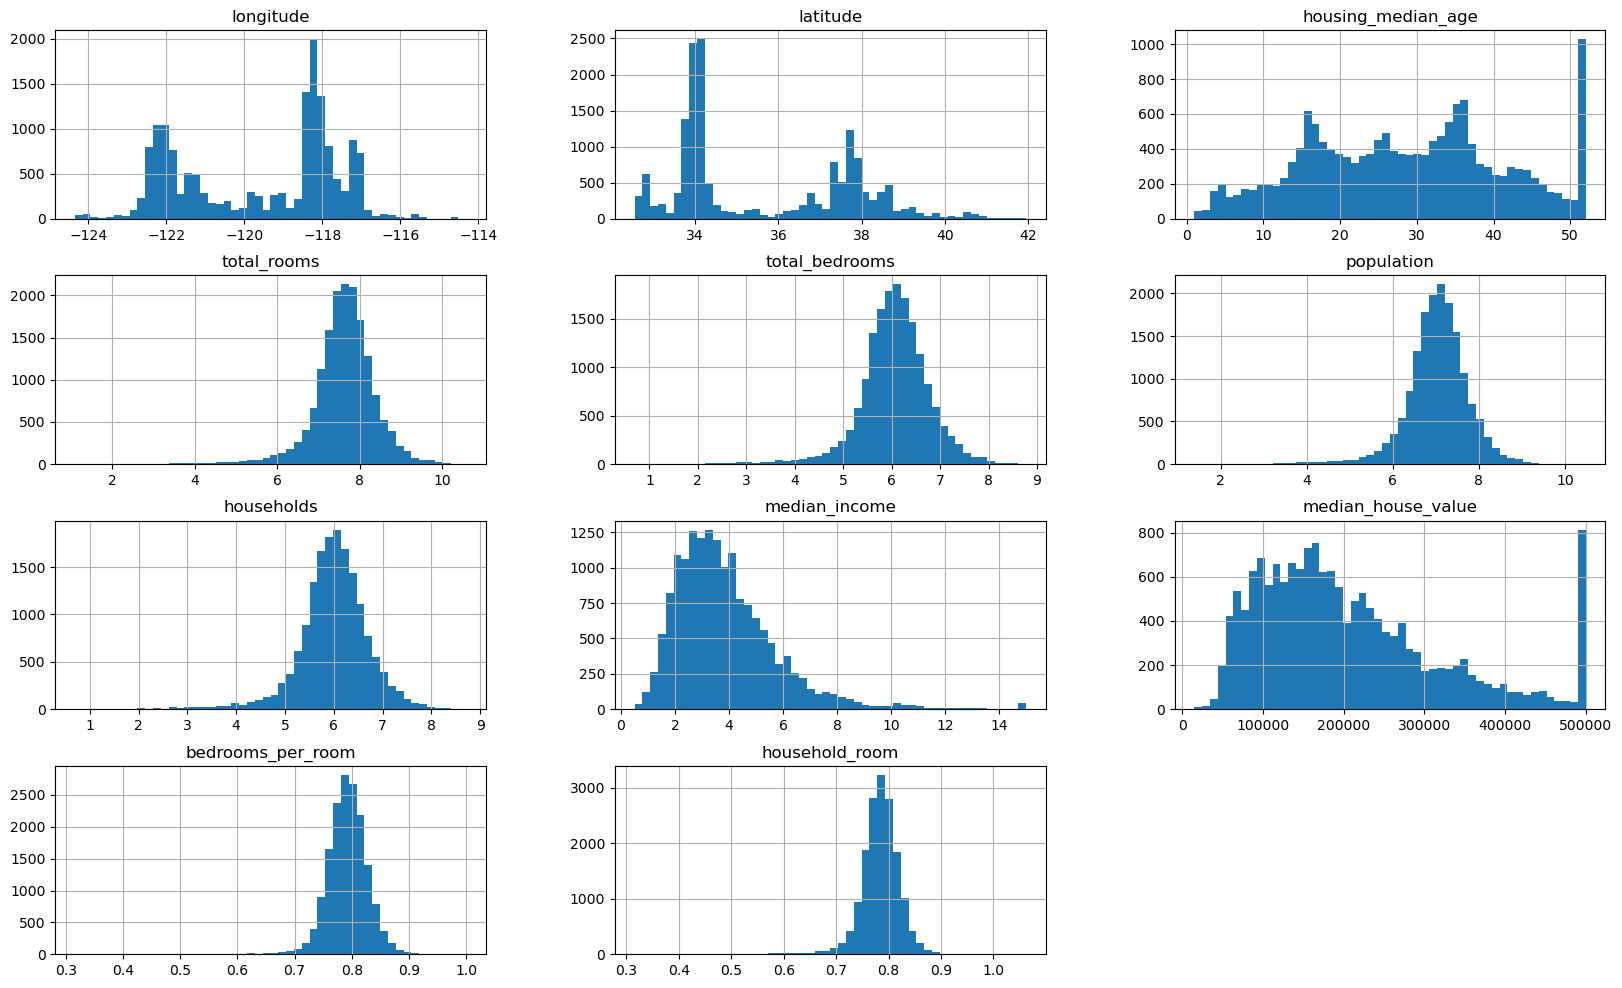

In [20]:
df_train.hist(figsize=(20, 12),bins = 50)

<Axes: >

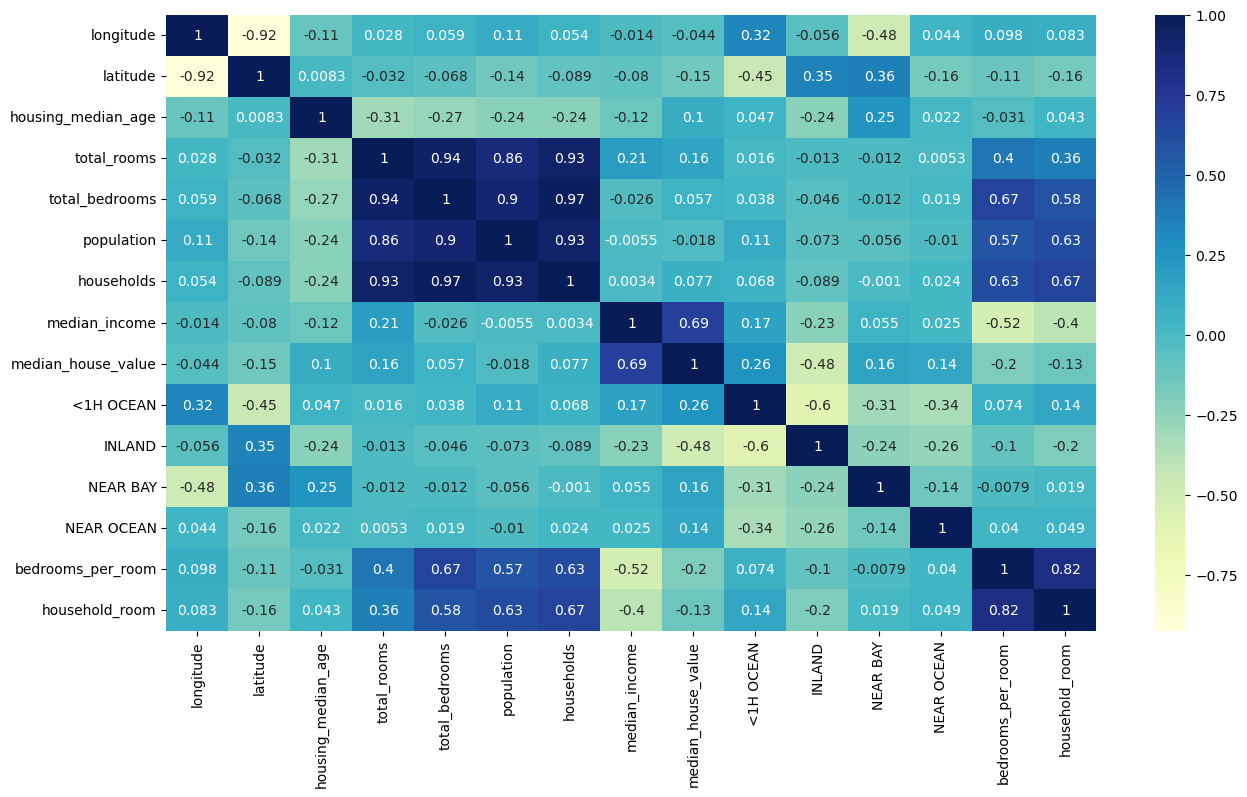

In [21]:
plt.figure(figsize=(15, 8))
sns.heatmap(df_train.corr(), annot=True,cmap='YlGnBu')

## California Housing Prices on map

In [22]:
import io
import urllib.request
from PIL import Image
import matplotlib.image as mpimg

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename

with urllib.request.urlopen(url) as url_request:
    image_data = url_request.read()

image_data = io.BytesIO(image_data)
california_img = mpimg.imread(image_data, format='png')

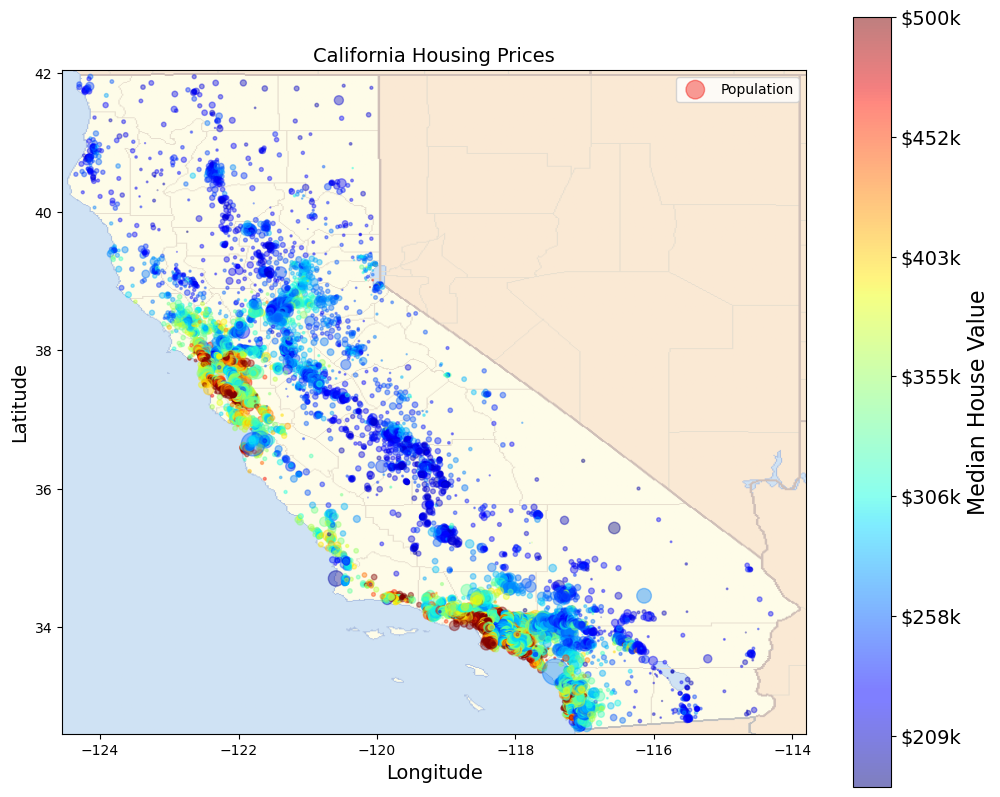

In [23]:
ax = df.plot(kind="scatter", x="longitude", y="latitude", figsize=(12,10),
                  s=df['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.title("California Housing Prices", fontsize=14)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = df["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.show()

# 3. Training and Selecting a Model

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = df_train.drop('median_house_value', axis=1), df_train['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)

NameError: name 'df_train' is not defined

In [25]:
df_test = transform_data(X_test.join(y_test))

In [26]:
X_test, y_test = df_test.drop('median_house_value', axis=1), df_test['median_house_value']

In [27]:
X_test_s = scaler.transform(X_test)

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Median House Value')

# Calculate the minimum and maximum values across both y_test and y_pred
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))

# Draw the red line from (min_val, min_val) to (max_val, max_val)
plt.plot([min_val, max_val], [min_val, max_val], color='red')

plt.show()


NameError: name 'plt' is not defined

In [37]:
reg.score(X_test_s, y_test)

0.6742628845410206

In [39]:
print(X_test_s, y_test)

[[-1.20591825  1.26686151 -0.84851338 ... -0.38734376  0.91310438
   0.90054851]
 [-1.37577704  1.08451583  0.66230015 ... -0.38734376 -0.3874581
  -0.06887293]
 [-1.45571058  1.00035629  1.85504768 ... -0.38734376  0.6081838
   0.63950701]
 ...
 [-0.92615084  1.36504764  0.50326715 ... -0.38734376 -2.306035
  -1.42413051]
 [-1.48568566  1.06113818  0.98036616 ... -0.38734376  0.16278583
  -0.13039885]
 [-2.25005019  2.44977061  0.18520114 ...  2.58168611  1.41109956
   1.39420445]] 19023    129500.0
1706     196600.0
16152    348500.0
17855    500001.0
10603    199600.0
           ...   
17761    193400.0
281      285800.0
12510     98900.0
9397     389200.0
2587     153100.0
Name: median_house_value, Length: 4086, dtype: float64


In [31]:
from sklearn.metrics import mean_squared_error

mse_linear_regression = mean_squared_error(y_test, y_pred)
print("MSE for Linear Regression:", mse_linear_regression)

MSE for Linear Regression: 4405523509.372256


In [33]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [38]:
# Forest is fitted RandomForestRegressor model
y_pred_forest = forest.predict(X_test_s)

# Calculate MSE between the predicted values and the actual values
mse_random_forest = mean_squared_error(y_test, y_pred_forest)

# Print the MSE
print("MSE for RandomForest Regression:", mse_random_forest)

MSE for RandomForest Regression: 2504085711.474324


In [34]:
forest.score(X_test_s, y_test)

0.814852047711824

In [47]:
!pip install xgboost
import xgboost as xgb

X_train.columns = X_train.columns.str.replace('<', '')
X_test.columns = X_test.columns.str.replace('<', '')

xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                                n_estimators=300,
                                learning_rate=0.1,
                                max_depth=10,
                                gamma=1,
                                subsample=0.8,
                                colsample_bytree=0.8,
                                )
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [49]:
# Determine mean square error and root mean square error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math

mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(mse)
print(rmse)
print(mae)
xgb_model.score(X_test, y_test)

2171923911.0705347
46603.90446164929
30078.080200494063


0.8394115413790382

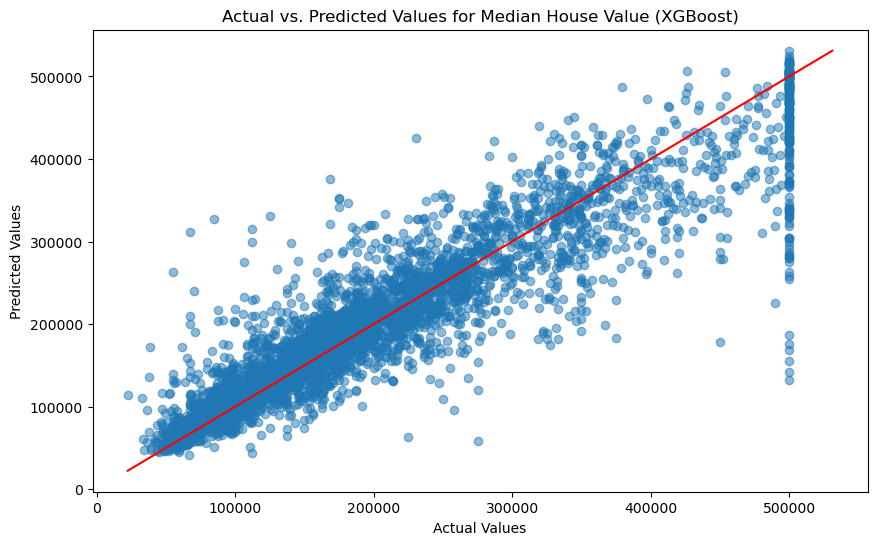

In [50]:
# Generate predictions for the test set using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Median House Value (XGBoost)')
min_val = min(min(y_test), min(y_pred_xgb))
max_val = max(max(y_test), max(y_pred_xgb))
plt.plot([min_val, max_val], [min_val, max_val], color='red')  # Line of perfect predictions
plt.show()

XGBoost often performs better due to features like regularization, tree pruning, handling missing values, built-in cross-validation, parallel processing, high flexibility, and continued training. These features help prevent overfitting, improve speed, and make the model adaptable to different problem domains.